In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df=pd.read_csv('Position_Salaries.csv')
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1:].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scy=StandardScaler()
X=scx.fit_transform(x)
Y=scy.fit_transform(y)
print(X,"\n")
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [61]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,Y)

c:\Users\amand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [64]:
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

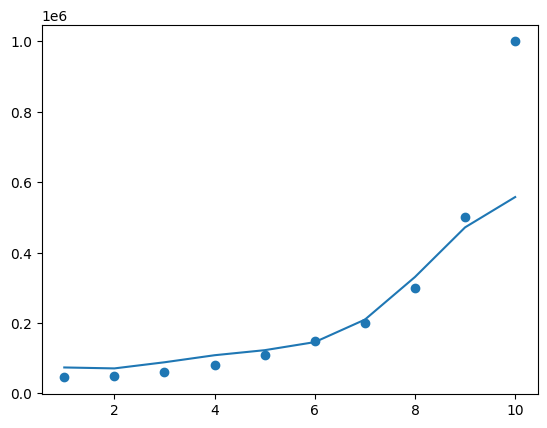

In [67]:
plt.scatter(scx.inverse_transform(X),scy.inverse_transform(Y))
plt.plot(scx.inverse_transform(X),scy.inverse_transform(regressor.predict(X).reshape(-1,1)))